<h1><center> Data Collection - Spotify Tracks </center></h1>

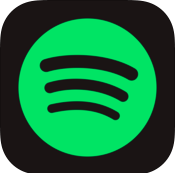

Using my complete album list, I will define a function in order to search an album by name and return:
- Album Id
- Release_date
- Total Tracks In Album
- Track title
- Artist Name



In [2]:
import pandas as pd
import sys
import spotipy
import spotipy.util as util
import time
from spotipy.oauth2 import SpotifyClientCredentials

In [4]:
album_list = pd.read_csv('../00_Data/albums_spot_list.csv')
riaa_df = pd.read_csv('../00_Data/df_riaa.csv')
album_list = pd.DataFrame(album_list['0'].unique())

### Token Authorization

In [41]:
scope = 'user-library-read'

if len(sys.argv) > 1:
    username = sys.argv[1]
else:
    print ("Usage: %s username" % (sys.argv[0],))
    sys.exit()

token = util.prompt_for_user_token(username,scope,client_id='23e7ed135658410698818505b543dabb',client_secret='a86d41a058e64658b83d7c5900dff17f',redirect_uri='http://localhost/')


client_credentials_manager = SpotifyClientCredentials(client_id= '23e7ed135658410698818505b543dabb',
                                                      client_secret= 'a86d41a058e64658b83d7c5900dff17f')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager , auth = token )

### Definition to get track & track info from album

In [20]:
def get_album_track(album):
    results = sp.search(q = "album:" + album, type = "album")
    album_id = results['albums']['items'][0]['uri']
    release_date =  results['albums']['items'][0]['release_date']
    total_tracks =  results['albums']['items'][0]['total_tracks']
    tracks = sp.album_tracks(album_id )
    artist_name = results['albums']['items'][0]['artists'][0]['name']
    track_info = []
    for track in tracks['items']:
        track_info.append([track['name'] , track['id'], artist_name , album , release_date , total_tracks])
    return track_info

In [5]:
album_list_list = list(album_list[0])

In [6]:
song_list = []
song_id = []
artist_list = []
album_list = []
release_date_list = []
total_tracks_list = []


#### Try & Excpet:
   - If an error is encountered, a try block code execution will be stopped and then transferred down to the except block, once at the except block it will execute whatever is underneath the except block. The reason for this is because web scraping is time consuming, this particular scrape took 7-8 hours, my authorization token would expire about every 30 minutes. So using Try & Except lets the for loop run until my loop errors out and Spotify ask for my authorization code again, then the except block will present it and it can keep running

In [1]:
for i in album_list_list:
    try:
        info = get_album_track(i)
        time.sleep(.5)
        for song,id, artist, album , release_date, total_tracks in info:
            song_list.append(song)
            song_id.append(id)
            artist_list.append(artist)
            album_list.append(album)
            release_date_list.append(release_date)
            total_tracks_list.append(total_tracks)
    except:
        time.sleep(3)

*Since My albums list only accounted for each artist albums and not tracks they released as singles not in their album. I will repeat this proccess for my songs from RIAA so when I merge the two they are in the same format.

### Function for searching for track by artist instead of album ID

In [21]:
def search_by_track_artist(artist, track):
    info_riaa = sp.search(q='artist:{} track:{}'.format(artist, track))
    track_riaa = info_riaa['tracks']['items'][0]['name']
    track_id_riaa = info_riaa['tracks']['items'][0]['id']
    release_date_riaa = info_riaa['tracks']['items'][0]['album']['release_date']
    artist_riaa = info_riaa['tracks']['items'][0]['album']['artists'][0]['name']
    total_tracks_riaa = info_riaa['tracks']['items'][0]['album']['total_tracks']
    album_riaa = info_riaa['tracks']['items'][0]['album']['name']
    riaa_info = []
    riaa_info.append([track_riaa , track_id_riaa , artist_riaa ,album_riaa , release_date_riaa , total_tracks_riaa] )
    
    return riaa_info[0]

In [22]:
riaa_for = riaa_df[['artist','song']]

In [33]:
song_list_riaa = []
song_id_riaa = []
artist_list_riaa = []
album_list_riaa = []
release_date_list_riaa = []
total_tracks_list_riaa = []
award_list_riaa = []

### Gathering Info

- Using my function to grab track info for every single ablum in album list and append song aspects into respective list
- Creating a dictionary for track aspect and track info in order to create an organized data frame

In [42]:
for i in range(4142):
    try:
        riaa_info = search_by_track_artist(riaa_for['artist'][i] , riaa_for['song'][i] )
        song_list_riaa.append(riaa_info[0])
        song_id_riaa.append(riaa_info[1] ) 
        artist_list_riaa.append(riaa_info[2]) 
        album_list_riaa.append(riaa_info[3]) 
        release_date_list_riaa.append(riaa_info[4]) 
        total_tracks_list_riaa.append(riaa_info[5])
        award_list_riaa.append(riaa_df.award[i])
    except:
        time.sleep(2)

retrying ...1secs


In [45]:
df_dict_riaa = {
    'track': song_list_riaa,
    'track_id': song_id_riaa,
    'artist': artist_list_riaa,
    'album': album_list_riaa,
    'release_date': release_date_list_riaa,
    'total_tracks': total_tracks_list_riaa,
    'award': award_list_riaa
}

In [46]:
riaa_songs_df = pd.DataFrame(df_dict_riaa)

In [47]:
riaa_songs_df.to_csv('./Data/riaa_songs_df_with_ids.csv' , index = False)

## Exporting RIAA songs & Album Songs to CSV for later use

In [1]:
df_songs = pd.DataFrame(df_dict)

In [2]:
df_songs.to_csv('../00_Data/df_songs.csv' , index = False)